In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [45]:
train=pd.read_csv("D:/machine learning/boston house/house-prices-advanced-regression-techniques_2/train.csv")
test=pd.read_csv("D:/machine learning/boston house/house-prices-advanced-regression-techniques_2/test.csv")

In [46]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Data visualization and analyize  sales price


E:\Program Files\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


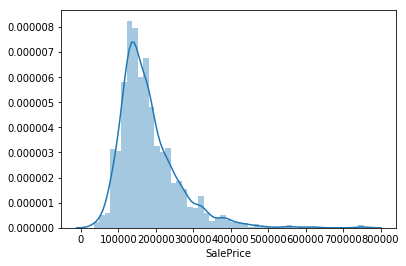

In [48]:
sns.distplot(train['SalePrice'])

it seems to be positive skew

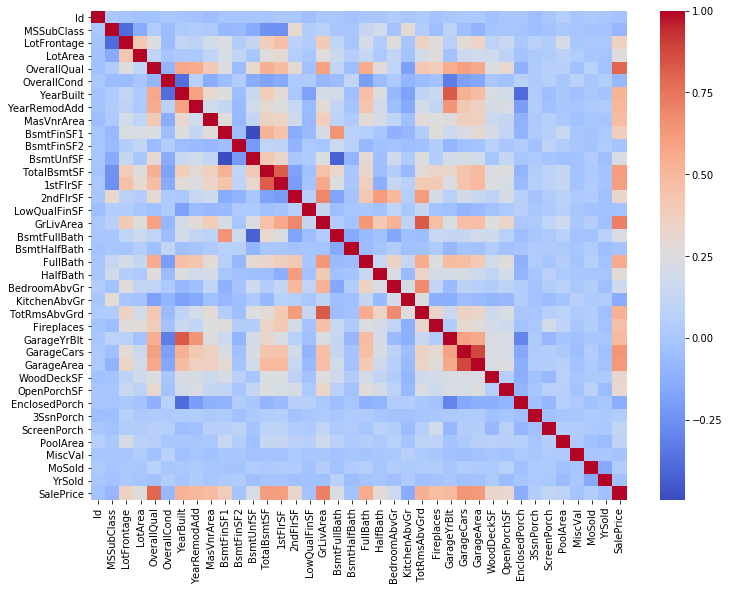

In [49]:
plt.figure(figsize=(12,9))
sns.heatmap(train.corr(), cmap='coolwarm')

there are many items that are correlated to sales price ('OverallQual','YearBuilt','FullBath','TotRmsAbvGrd',
             'GarageCars','GarageArea')


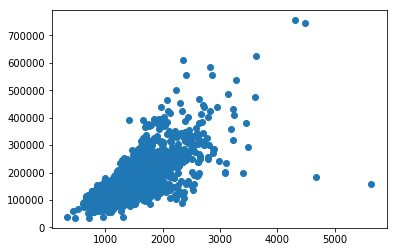

In [50]:

plt.scatter(train['GrLivArea'], train['SalePrice'])

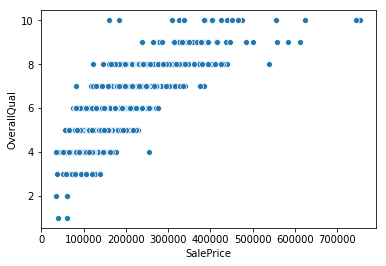

In [51]:
sns.scatterplot(x="SalePrice", y="OverallQual" , data=train)

In [52]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


the features that have null values are not affected in SALES PRICE , so we can drop it

In [53]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing

0

In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [55]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);


E:\Program Files\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Program Files\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
data = train[['OverallQual','YearBuilt','FullBath','TotRmsAbvGrd',
             'GarageCars','GarageArea','PoolArea']]

In [57]:
y=train["SalePrice"]
X=data
X.shape

(1459, 7)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [61]:
print(lm.intercept_)

-545900.5410105705


In [20]:
print(lm.coef_)

[29159.06099799   219.09362294  2664.42974546 11176.75468595
  6531.09616117    60.58896421   -55.69769958]


In [21]:
predictions=lm.predict(X_test)


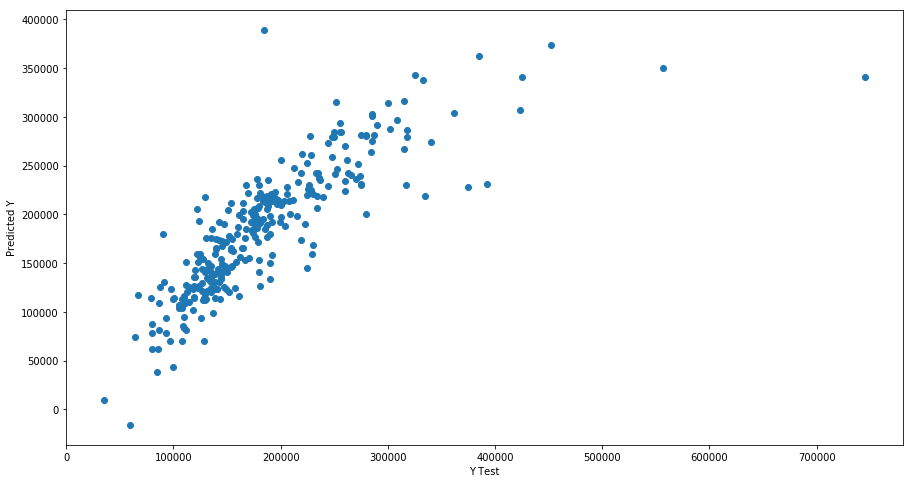

In [22]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [62]:
data_test = test[['OverallQual','YearBuilt','FullBath','TotRmsAbvGrd',
             'GarageCars','GarageArea','PoolArea']]

In [63]:
data_test.head()

,OverallQual,YearBuilt,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea
0,5,1961,1,5,1.0,730.0,0
1,6,1958,1,6,1.0,312.0,0
2,5,1997,2,6,2.0,482.0,0
3,6,1998,2,7,2.0,470.0,0
4,8,1992,2,5,2.0,506.0,0


In [64]:
data_test.isnull().sum()

OverallQual     0
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
PoolArea        0
dtype: int64

In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
OverallQual     1459 non-null int64
YearBuilt       1459 non-null int64
FullBath        1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
GarageCars      1458 non-null float64
GarageArea      1458 non-null float64
PoolArea        1459 non-null int64
dtypes: float64(2), int64(5)
memory usage: 79.9 KB


In [66]:

data_test.fillna(0, inplace=True)

E:\Program Files\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [67]:
data_test.isnull().sum()

OverallQual     0
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
PoolArea        0
dtype: int64

In [68]:
scaler=StandardScaler()
X=scaler.fit_transform(data_test)


E:\Program Files\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Program Files\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
predictions1 = lm.predict(X)

In [70]:
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':predictions1})

#Visualize the first 5 rows

In [73]:
submission.head(30)

,Id,SalePrice
0,1461,-587237.778717
1,1462,-559664.961827
2,1463,-566428.943858
3,1464,-538714.051261
4,1465,-512964.374399
5,1466,-538758.477152
6,1467,-546181.053441
7,1468,-538735.525592
8,1469,-538080.816661
9,1470,-606533.263678


In [72]:
from sklearn.metrics import mean_absolute_error
maevalue=mean_absolute_error(y_test,predictions , multioutput='uniform_average')